In [1]:
import numpy as np
import json
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# this one's for making up data
from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

/home/marta/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Read in the data and drop the not needed columns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,totalCarNumber,avg_overhead,median_overhead,q1_overhead,q3_overhead,p9_overhead,label
0,200,1.643255,1.565419,1.322193,1.816262,2.186887,0
1,200,1.685066,1.579617,1.297106,1.874036,2.190612,0
2,300,2.302195,1.646843,1.344169,2.025062,2.415504,0
3,400,1.821426,1.675592,1.346947,2.031449,2.459303,0
4,500,2.275605,1.762750,1.393507,2.225248,2.870655,1


In [3]:
test_data = df.drop(['totalCarNumber', 'label', 'avg_overhead'], axis=1)
test_data.head()

,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,1.565419,1.322193,1.816262,2.186887
1,1.579617,1.297106,1.874036,2.190612
2,1.646843,1.344169,2.025062,2.415504
3,1.675592,1.346947,2.031449,2.459303
4,1.762750,1.393507,2.225248,2.870655


## Transform the data to numpy array. Split data to simulate data streams

Function for plotting silhouette score and retriving the most optimal number of clusters

In [4]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusers')
        plt.ylabel('Silhouette Score')
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

In [5]:
test_normal = test_data.to_numpy()
test_normal_list = np.split(test_normal, 4)
for i in test_normal_list:
    print(i[0])

[1.56541916 1.32219289 1.81626156 2.18688667]
[1.82730326 1.37826543 2.3501602  3.11435678]
[1.56061847 1.34073747 1.8435084  2.13181906]
[1.80806821 1.40434542 2.28493369 2.92696347]


In [11]:
test_normal = test_data.to_numpy()
test_normal_list = np.split(test_normal, 4)
for i in test_normal_list:
    print(i[0])

[  1.56541916   1.32219289   1.81626156   2.18688667 200.        ]
[  1.82730326   1.37826543   2.3501602    3.11435678 600.        ]
[  1.56061847   1.34073747   1.8435084    2.13181906 200.        ]
[  1.80806821   1.40434542   2.28493369   2.92696347 600.        ]


In [12]:
test_normal = test_data.to_numpy()
test_normal_list = np.split(test_normal, 4)
for i in test_normal_list:
    print(i[0])

[  1.56541916   1.32219289   1.81626156   2.18688667 200.        ]
[  1.82730326   1.37826543   2.3501602    3.11435678 600.        ]
[  1.56061847   1.34073747   1.8435084    2.13181906 200.        ]
[  1.80806821   1.40434542   2.28493369   2.92696347 600.        ]


## Fit the birch model, plot silhouette score and predict the data labels. 

# Set the correct threshold!!!

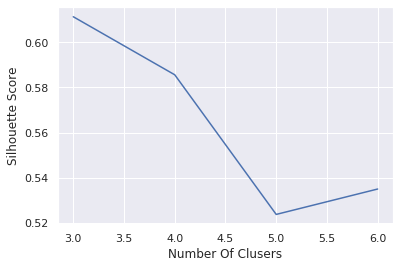

The highest silhouette scores(0.6112616839016369) is for 3 clusers


In [6]:
normal_birch = Birch(n_clusters = None, threshold = 0.05)

# for i in test_normal_list:
#     normal_birch.partial_fit(i)

normal_birch.partial_fit(test_normal)

n = plot_silhouette_scores(normal_birch, test_normal, 3, 6)

normal_birch.set_params(n_clusters = n)
normal_birch.partial_fit()
    
labels = normal_birch.predict(test_normal)

## For plotting purposes  add number of cars to a numpy array

In [17]:
test_data['cars'] = df['totalCarNumber']
test_normal = test_data.to_numpy()

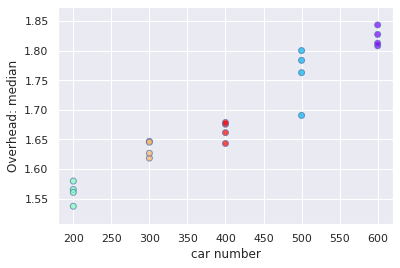

In [18]:
plt.scatter(test_normal[:,4], test_normal[:,0], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
plt.ylabel('Overhead: median')
plt.xlabel('car number')
# plt.savefig('./feature_test/carVSmedian.png')
plt.show()

plt.close()

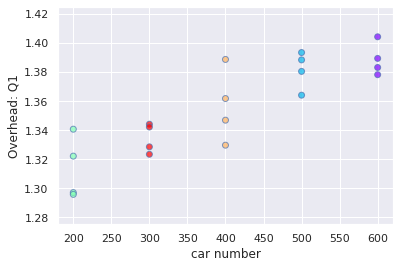

In [54]:
plt.scatter(test_normal[:,4], test_normal[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
plt.ylabel('Overhead: Q1')
plt.xlabel('car number')
plt.savefig('./feature_test/carVSq1.png')
plt.show()

plt.close()

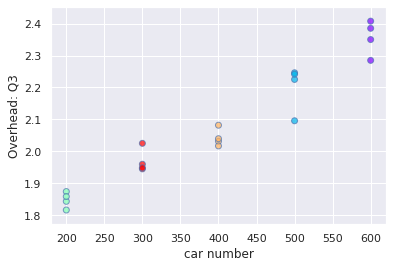

In [55]:
plt.scatter(test_normal[:,4], test_normal[:,2], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
plt.ylabel('Overhead: Q3')
plt.xlabel('car number')
plt.savefig('./feature_test/carVSq3.png')
plt.show()

plt.close()

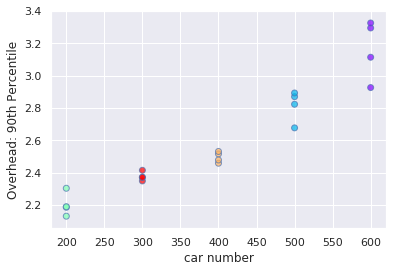

In [56]:
plt.scatter(test_normal[:,4], test_normal[:,3], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
plt.ylabel('Overhead: 90th Percentile')
plt.xlabel('car number')
plt.savefig('./feature_test/carVSpercentile90.png')
plt.show()

plt.close()

FileNotFoundError: [Errno 2] No such file or directory: './feature_test/results.png'

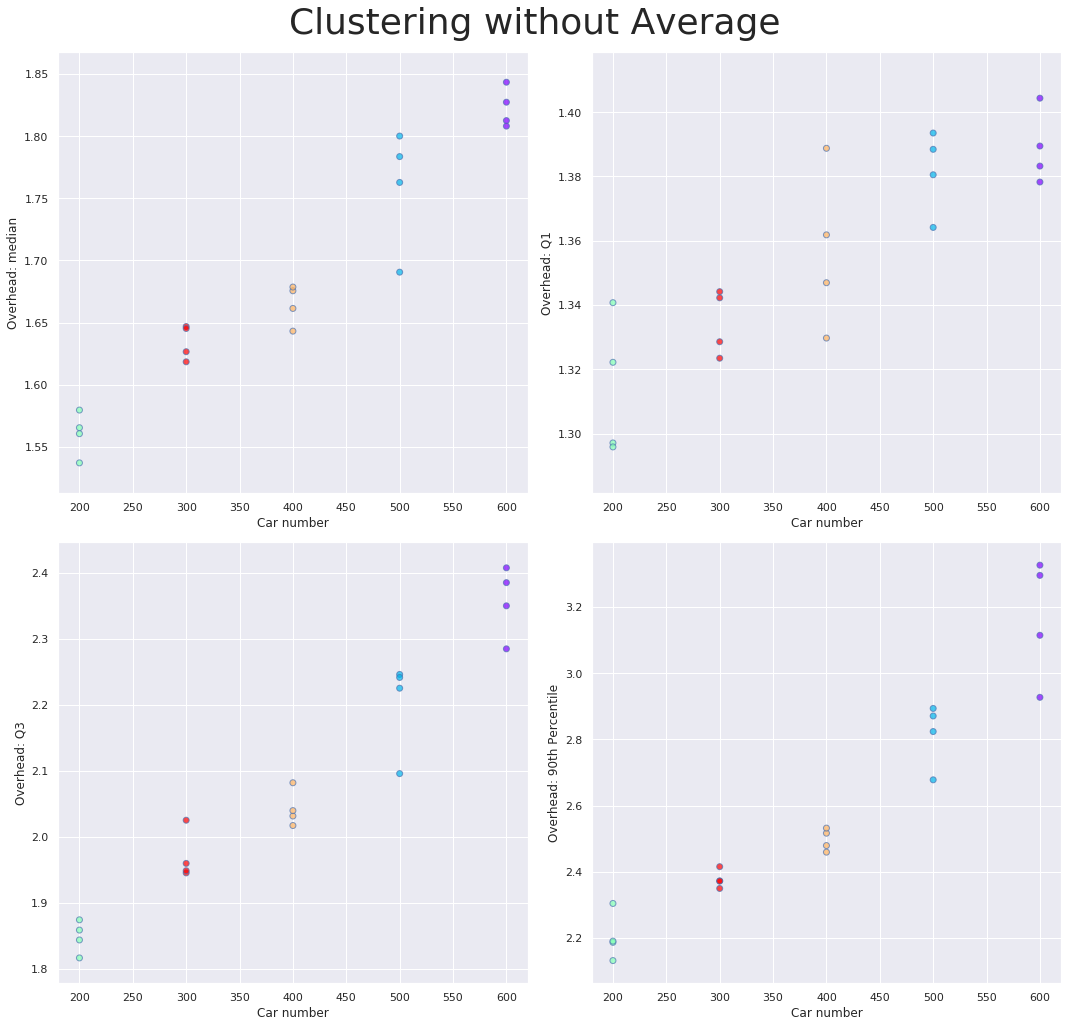

In [64]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(test_normal[:,4], test_normal[:,0], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[0,0].set_ylabel('Overhead: median')
axs[0,0].set_xlabel('Car number')

axs[0,1].scatter(test_normal[:,4], test_normal[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[0,1].set_ylabel('Overhead: Q1')
axs[0,1].set_xlabel('Car number')

axs[1,0].scatter(test_normal[:,4], test_normal[:,2], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[1,0].set_ylabel('Overhead: Q3')
axs[1,0].set_xlabel('Car number')

axs[1,1].scatter(test_normal[:,4], test_normal[:,3], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
axs[1,1].set_ylabel('Overhead: 90th Percentile')
axs[1,1].set_xlabel('Car number')

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Clustering without Average', fontsize=36)
# figure.savefig('./feature_test/results.png')